In [1]:
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(vegan)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library("pairwiseAdonis"); packageVersion("pairwiseAdonis")


Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2020 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:vegan’:

    diversity


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.1.2     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1
✔ dplyr   1.0.8     

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dp

[1] ‘0.0.1’

In [2]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list

tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data


taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
# Convert taxonomy info to data frame with correct taxonomy labels
#taxa <- taxa_16S[-1,]
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) %>%
filter(Phylum !=" p__Chlorophyta") %>%
filter(Phylum !="NA")

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11, 12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [3]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA"))

In [4]:
ps_pre= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps_pre

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [5]:
dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps_pre, !ID %in% dups & Genotype!=c("U41"))
                                                    #,"U44")) 
ps


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [111]:
#ps = subset_taxa(ps, Genus!=" g__MD3-55" )
#ps

In [8]:
subset_samples(ps_pre, Type=="Homogenate")

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 7 samples ]
sample_data() Sample Data:       [ 7 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [9]:
ps_razor =subset_samples(ps, Type=="Razor")
ps_razor

ps_razor_nr =subset_taxa(ps_razor, Genus!="g__MD3-55" )
ps_razor_nr

ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped


ps_clip_nr =subset_taxa(ps_Clipped, Genus!="g__MD3-55" )
ps_clip_nr

ps_neg =subset_samples(ps, Type=="Neg")
ps_neg




#ps_cells =subset_samples(ps, Type=="Sorted_cells")
#ps_cells


#ps_neg_homo =subset_samples(ps, Type=="Neg" | Type=="Homogenate")
#ps_neg_homo


#ps_cells_homo =subset_samples(ps, Type=="Sorted_cells" | Type=="Homogenate")
#ps_cells_homo


ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

ps_unpaired =subset_samples(ps_Clipped, Pairs=="unpaired")
ps_unpaired


#ps_unpaired =subset_samples(ps_Clipped, Pairs=="unpaired")
#ps_unpaired

ps_Am_Pl =subset_samples(ps, Combo=="Ambient_Placebo")
ps_Am_Pl

ps_Am_Pl_c =subset_samples(ps_Clipped, Combo=="Ambient_Placebo")
ps_Am_Pl_c

ps_Am_Pl_r =subset_samples(ps_razor, Combo=="Ambient_Placebo")
ps_Am_Pl_r

ps_placebo =subset_samples(ps_paired, Diseased=="Placebo")
ps_placebo

ps_pathogen =subset_samples(ps_paired, Diseased=="Pathogen")
ps_pathogen

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7725 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 7725 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 7725 tips and 6818 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7725 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 7725 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 7725 tips and 6818 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 56 samples ]
sample_data() Sample Data:       [ 56 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 62 samples ]
sample_data() Sample Data:       [ 62 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 42 samples ]
sample_data() Sample Data:       [ 42 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 20 samples ]
sample_data() Sample Data:       [ 20 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 77 samples ]
sample_data() Sample Data:       [ 77 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 58 samples ]
sample_data() Sample Data:       [ 58 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [10]:
ps_fill_razor = filter_taxa(ps_razor, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_razor 
                            
ps_fill_razor_nr = filter_taxa(ps_razor_nr, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_razor_nr                          

ps_fill_clip = filter_taxa(ps_Clipped, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_clip
                           
ps_fill_clip_nr = filter_taxa(ps_clip_nr, function(x) sum(x > 5) > (0.001*length(x)), TRUE)
ps_fill_clip_nr                           

ps_fill_neg = filter_taxa(ps_neg, function(x) sum(x > 0) > (0.00*length(x)), TRUE)
ps_fill_neg                         

#ps_fill_homogenate = filter_taxa(ps_homogenate, function(x) sum(x > 0) > (0.00*length(x)), TRUE)
#ps_fill_homogenate

#ps_fill_cells = filter_taxa(ps_cells, function(x) sum(x > 0) > (0.00*length(x)), TRUE)
#ps_fill_cells
 
                           
                           
ps_fill_pair = filter_taxa(ps_paired, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_pair  
                           
ps_fill_unpair = filter_taxa(ps_unpaired, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_unpair    
                             
ps_fill_Am_Pl_c =  filter_taxa(ps_Am_Pl_c, function(x) sum(x > 5) > (0.01*length(x)), TRUE)                           
ps_fill_Am_Pl_c  
                               
ps_fill_Am_Pl_r =  filter_taxa(ps_Am_Pl_r, function(x) sum(x > 5) > (0.01*length(x)), TRUE)                           
ps_fill_Am_Pl_r    
                               
 ps_placebo_fill = filter_taxa(ps_placebo, function(x) sum(x > 10 ) > (0.015*length(x)), TRUE)
    ps_placebo_fill  
                               
                               
 ps_pathogen_fill = filter_taxa(ps_pathogen, function(x) sum(x > 10 ) > (0.015*length(x)), TRUE)
    ps_pathogen_fill                              

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 921 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 921 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 921 tips and 859 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 753 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 753 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 753 tips and 710 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1845 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 1845 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1845 tips and 1561 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5521 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 5521 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 5521 tips and 4881 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 212 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 212 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 212 tips and 199 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1594 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 1594 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1594 tips and 1360 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1741 taxa and 56 samples ]
sample_data() Sample Data:       [ 56 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 1741 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1741 tips and 1653 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2022 taxa and 42 samples ]
sample_data() Sample Data:       [ 42 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 2022 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2022 tips and 1939 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 317 taxa and 20 samples ]
sample_data() Sample Data:       [ 20 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 317 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 317 tips and 299 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 592 taxa and 77 samples ]
sample_data() Sample Data:       [ 77 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 592 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 592 tips and 513 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3074 taxa and 58 samples ]
sample_data() Sample Data:       [ 58 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 3074 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 3074 tips and 2697 internal nodes ]

In [115]:
ps_clr_razor <- microbiome::transform(ps_fill_razor, 'clr')
psr_clr.ord_razor <- ordinate(ps_clr_razor, "RDA", "euclidean")

ps_clr_razor_nr <- microbiome::transform(ps_fill_razor_nr, 'clr')
psr_clr.ord_razor_nr <- ordinate(ps_clr_razor_nr, "RDA", "euclidean")



ps_clr_clip <- microbiome::transform(ps_fill_clip, 'clr')
psr_clr.ord_clip <- ordinate(ps_clr_clip, "RDA", "euclidean")


ps_clr_fill_pair <- microbiome::transform(ps_fill_pair, 'clr')
ps_clr.ord_fill_pair <- ordinate(ps_clr_fill_pair, "RDA", "euclidean")

ps_clr_fill_unpair <- microbiome::transform(ps_fill_unpair, 'clr')
ps_clr.ord_fill_unpair <- ordinate(ps_clr_fill_unpair, "RDA", "euclidean")


ps_clr_Am_Pl_c  <- microbiome::transform(ps_fill_Am_Pl_c, 'clr')                           
ps_clr.ord_Am_Pl_c  <- ordinate(ps_clr_Am_Pl_c, "RDA", "euclidean")
                               
ps_clr_Am_Pl_r  <- microbiome::transform(ps_fill_Am_Pl_r, 'clr')                           
ps_clr.ord_Am_Pl_r  <- ordinate(ps_clr_Am_Pl_r, "RDA", "euclidean")


ps_clr_Pl_c  <- microbiome::transform(ps_placebo_fill, 'clr')                           
ps_clr.ord_Pl_c  <- ordinate(ps_placebo_fill, "RDA", "euclidean")


ps_clr_Pa_c  <- microbiome::transform(ps_pathogen_fill, 'clr')                           
ps_clr.ord_Pa_c  <- ordinate(ps_pathogen_fill, "RDA", "euclidean")

In [94]:
colnames(meta)

[1] "sample_names"               "featurecounts"             
 [3] "Initial_sample_ID"          "Tag"                       
 [5] "Date_Collected"             "Date"                      
 [7] "TimePoint"                  "Replicate"                 
 [9] "Genotype"                   "Nursery"                   
[11] "Nutrients"                  "Diseased"                  
[13] "Combo"                      "Tank_N"                    
[15] "Tank_D1"                    "Tank_D2"                   
[17] "Type"                       "Health"                    
[19] "Notes"                      "Severity"                  
[21] "Pairs"                      "Combo_health"              
[23] "Archive_box"                "Genotype.1"                
[25] "NH4_Susceptibility"         "Disease_Susceptibility"    
[27] "NH4_Disease_Susceptibility" "Expected"                  
[29] "surv"                       "std.err"                   
[31] "barcode_label"              "barcode_seq"               
[33] "ID"                         "Sequencing_Round"          
[35] "Plate_Name"                 "Plate_Barcode"             
[37] "Well_Position"              "Sequence_Name"             
[39] "Illumina5_Adapter"          "Forward_Primer_Pad"        
[41] "Golay_Barcode"              "X515FB_Forward_Primer"     
[43] "Primer_For_PCR"

In [116]:
ps_clr_df=as.data.frame(otu_table(ps_clr_fill_pair))
ps_clr_meta= as(sample_data(ps_clr_fill_pair), "data.frame")

adonis(t(ps_clr_df)~Diseased*Nutrients*Genotype*Health, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean", by = "margin")


Call:
adonis(formula = t(ps_clr_df) ~ Diseased * Nutrients * Genotype *      Health, data = ps_clr_meta, permutations = 999, method = "euclidean",      by = "margin") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Diseased                      1      8312  8311.9  8.1608 0.05065  0.001 ***
Nutrients                     1      1890  1889.9  1.8556 0.01152  0.003 ** 
Genotype                      9     23041  2560.1  2.5136 0.14041  0.001 ***
Health                        1      1628  1627.9  1.5983 0.00992  0.038 *  
Diseased:Nutrients            1      1769  1768.8  1.7367 0.01078  0.002 ** 
Diseased:Genotype             9     11673  1297.0  1.2735 0.07114  0.005 ** 
Nutrients:Genotype            9     10446  1160.6  1.1395 0.06365  0.083 .  
Diseased:Health               1       745   745.1  0.7316 0.00454  0.854    
Nutrients:Health              1       465   464.

In [119]:
sample_data(ps_clr_fill_pair) %>%
  group_by(Combo, Outcome) %>%
  summarize(Paired = n())

`summarise()` has grouped output by 'Combo'. You can override using the `.groups` argument.


Combo,Outcome,Paired
<chr>,<chr>,<int>
Ambient_Pathogen,Diseased,23
Ambient_Pathogen,Unaffected,3
Ambient_Placebo,Healthy,36
NH4_Pathogen,Diseased,30
NH4_Pathogen,Unaffected,2
NH4_Placebo,Diseased,5
NH4_Placebo,Healthy,36


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                           diff       lwr       upr     p adj
Healthy-Diseased      -76.66772 -1390.935 1237.6000 0.9895145
Unaffected-Diseased -2858.78332 -6330.655  613.0885 0.1284343
Unaffected-Healthy  -2782.11561 -6227.094  662.8629 0.1386398



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df     Sum Sq  Mean Sq      F N.Perm Pr(>F)
Groups      2   38378316 19189158 1.9433    999  0.148
Residuals 132 1303463022  9874720                     

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
           Diseased  Healthy Unaffected
Diseased            0.895000      0.013
Healthy    0.891655               0.078
Unaffected 0.019678 0.088209           


Call:
adonis(formula = t(ps_clr_df) ~ Outcome, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Outcome     2     10389  5194.6  4.4609 0.06331  0.001 ***
Residuals 132    153711  1164.5         0.93669           
Total     134    164100                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = t(ps_clr_df) ~ Outcome * Genotype, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                  Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Outcome            2     10389  5194.6  4.9494 0.06331  0.001 ***
Genotype           9     22384  2487.1  2.3697 0.13641  0.001 ***
Outcome:Genotype   9     11679  1297.6  1.2364 0.07117  0.007 ** 
Residuals        114    119648  1049.5         0.72912           
Total            134    164100                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

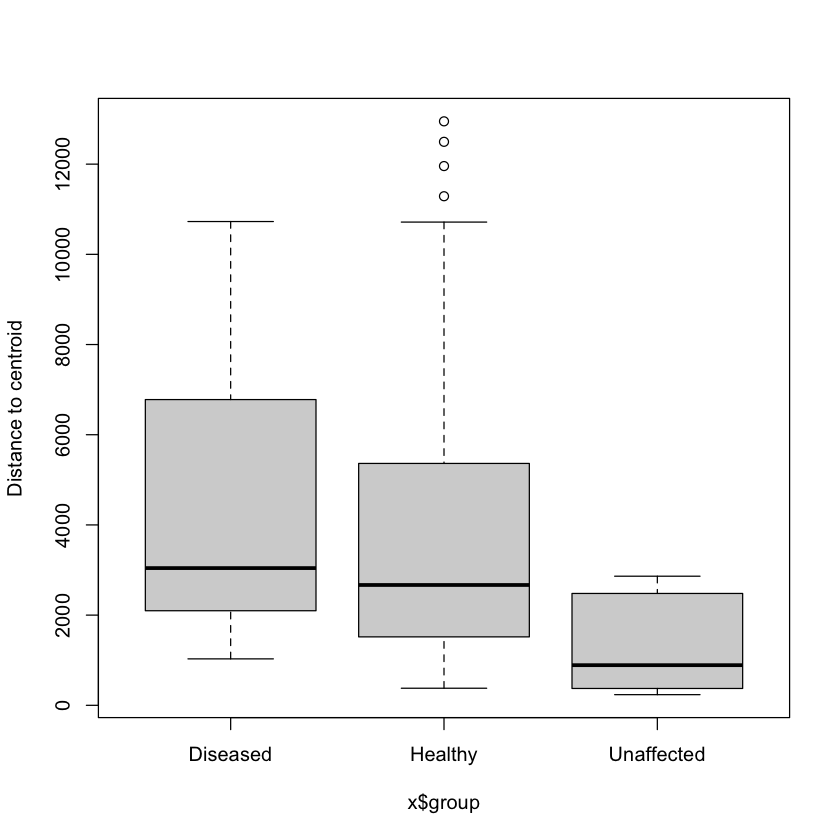

In [118]:
ps_clr_df=as.data.frame(otu_table(ps_clr_fill_pair))
ps_clr_meta= as(sample_data(ps_clr_fill_pair), "data.frame")


#distances between disease state
ps_clr <- vegdist(otu_table(t(ps_fill_pair)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_fill_pair)$Outcome)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)



adonis(t(ps_clr_df)~Outcome, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

adonis(t(ps_clr_df)~Outcome*Genotype, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

#  Health state: Lesion vs Apparently healthy (not dispersed)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
          diff       lwr      upr     p adj
DL-AH 59.50448 -1011.863 1130.872 0.9126881



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df     Sum Sq Mean Sq      F N.Perm Pr(>F)
Groups      1     117134  117134 0.0121    999   0.92
Residuals 133 1290856328 9705687                     

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
        AH    DL
AH         0.921
DL 0.91269      


Call:
adonis(formula = t(ps_clr_df) ~ Health, data = ps_clr_meta, permutations = 999,      method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Health      1      9532  9531.9  8.2019 0.05809  0.001 ***
Residuals 133    154568  1162.2         0.94191           
Total     134    164100                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = t(ps_clr_df) ~ Health * Genotype, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                 Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Health            1      9532  9531.9  9.1345 0.05809  0.001 ***
Genotype          9     22737  2526.4  2.4210 0.13856  0.001 ***
Health:Genotype   9     11828  1314.2  1.2594 0.07208  0.003 ** 
Residuals       115    120003  1043.5         0.73128           
Total           134    164100                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

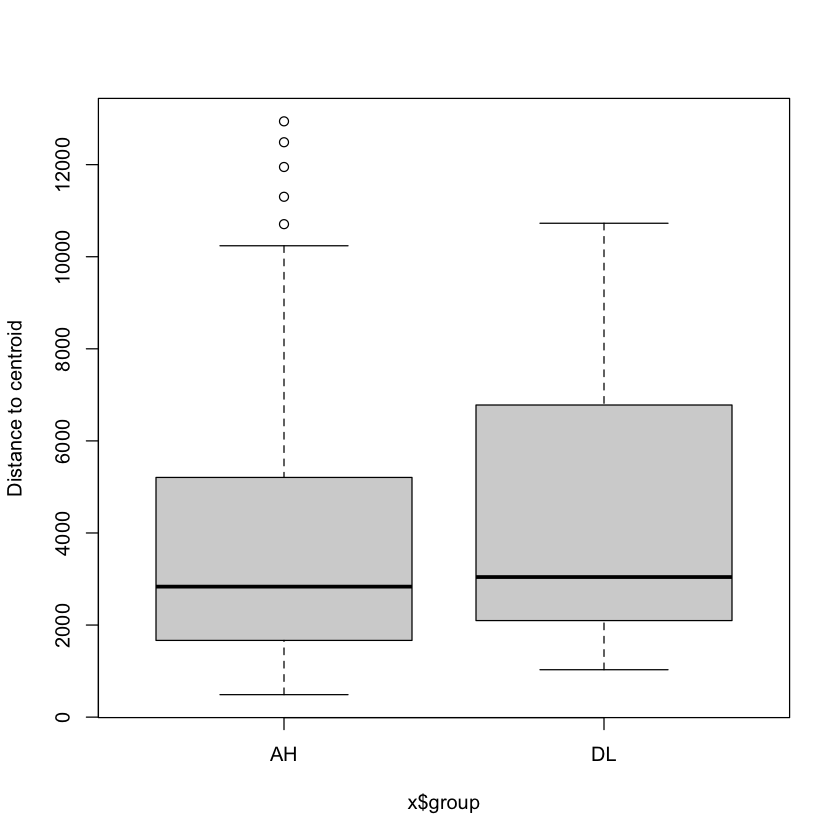

In [96]:
ps_clr_df=as.data.frame(otu_table(ps_clr_fill_pair))
ps_clr_meta= as(sample_data(ps_clr_fill_pair), "data.frame")


#distances between disease state
ps_clr <- vegdist(otu_table(t(ps_fill_pair)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_fill_pair)$Health)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)


adonis(t(ps_clr_df)~Health, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

adonis(t(ps_clr_df)~Health*Genotype, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

# Diseased : Placebo vs Diseased (not dispersed)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                     diff      lwr      upr     p adj
Placebo-Pathogen -201.516 -1297.27 894.2385 0.7166153



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df     Sum Sq  Mean Sq      F N.Perm Pr(>F)
Groups      1    1343396  1343396 0.1323    999  0.706
Residuals 133 1350291490 10152568                     

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
         Pathogen Placebo
Pathogen            0.714
Placebo   0.71662        


Call:
adonis(formula = t(ps_clr_df) ~ Diseased, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Diseased    1      8312  8311.9  7.0961 0.05065  0.001 ***
Residuals 133    155788  1171.3         0.94935           
Total     134    164100                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = t(ps_clr_df) ~ Diseased * Genotype, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                   Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Diseased            1      8312  8311.9  7.9104 0.05065  0.001 ***
Genotype            9     23087  2565.2  2.4413 0.14069  0.001 ***
Diseased:Genotype   9     11865  1318.4  1.2547 0.07231  0.004 ** 
Residuals         115    120836  1050.7         0.73636           
Total             134    164100                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

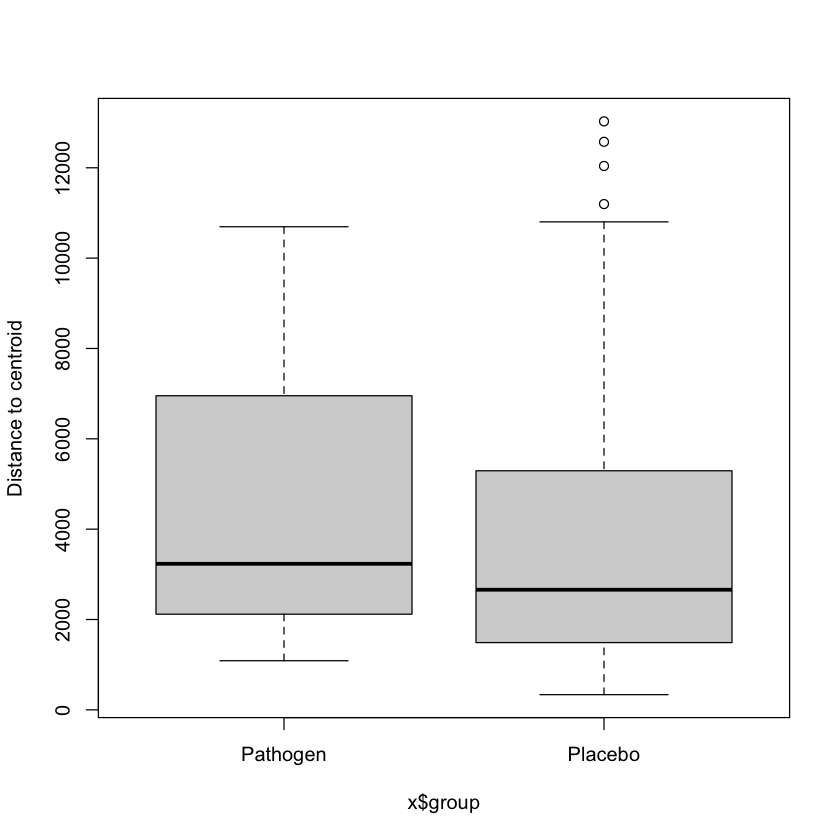

In [97]:


ps_clr_df=as.data.frame(otu_table(ps_clr_fill_pair))
ps_clr_meta= as(sample_data(ps_clr_fill_pair), "data.frame")


#distances between disease state
ps_clr <- vegdist(otu_table(t(ps_fill_pair)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_fill_pair)$Diseased)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)

# communties do not different in dispersion


ps_clr_df=as.data.frame(otu_table(ps_clr_fill_pair))
ps_clr_meta= as(sample_data(ps_clr_fill_pair), "data.frame")

adonis(t(ps_clr_df)~Diseased, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

adonis(t(ps_clr_df)~Diseased*Genotype, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

#pairwise.adonis(t(ps_clr_df), ps_clr_meta$Genotype, sim.method = "euclidean",
 #               p.adjust.m = "bonferroni")

#  Nutrients: Ambient vs NH4 (not dispersed)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                diff      lwr     upr     p adj
NH4-Ambient 970.3762 -109.028 2049.78 0.0776605



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df     Sum Sq  Mean Sq      F N.Perm Pr(>F)  
Groups      1   31569018 31569018 3.1619    999  0.087 .
Residuals 133 1327899184  9984204                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
         Ambient  NH4
Ambient          0.08
NH4     0.077661     


Call:
adonis(formula = t(ps_clr_df) ~ Nutrients, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)  
Nutrients   1      1925  1925.5  1.5791 0.01173  0.018 *
Residuals 133    162175  1219.4         0.98827         
Total     134    164100                 1.00000         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = t(ps_clr_df) ~ Nutrients * Genotype, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                    Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Nutrients            1      1925  1925.5  1.7167 0.01173  0.009 ** 
Genotype             9     22765  2529.5  2.2552 0.13873  0.001 ***
Nutrients:Genotype   9     10421  1157.8  1.0323 0.06350  0.319    
Residuals          115    128989  1121.6         0.78604           
Total              134    164100                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

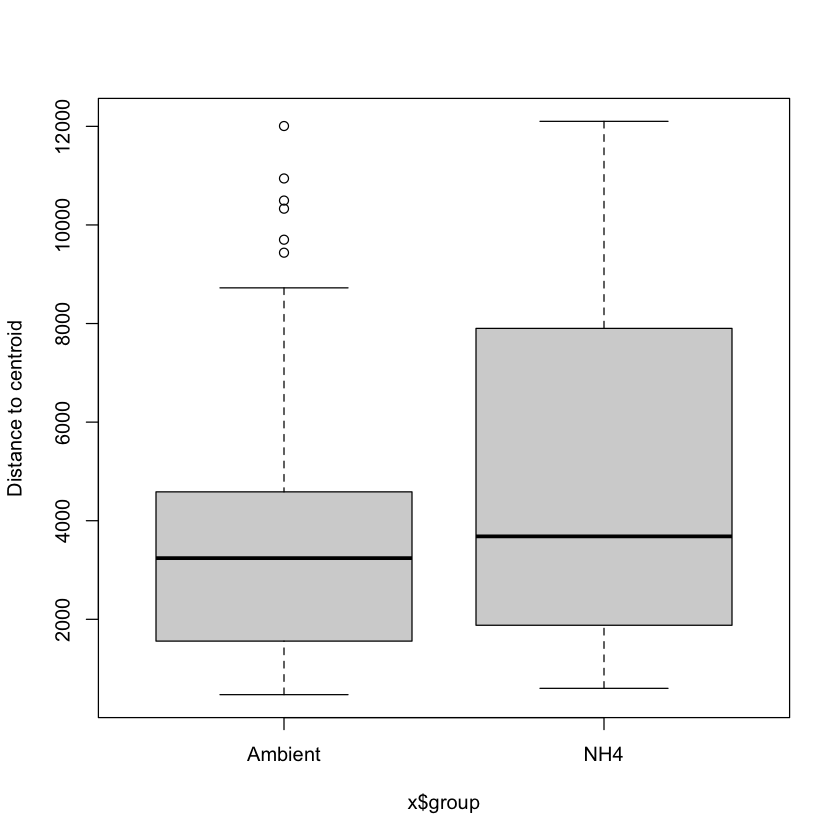

In [98]:
ps_clr <- vegdist(otu_table(t(ps_fill_pair)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_fill_pair)$Nutrients)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)



adonis(t(ps_clr_df)~Nutrients , 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

adonis(t(ps_clr_df)~Nutrients*Genotype , 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

# Nursery: CRF vs FWC vs UM (dispersed)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
              diff       lwr       upr     p adj
FWC-CRF -2528.4376 -4042.209 -1014.666 0.0003579
UM-CRF  -2594.8160 -4098.518 -1091.114 0.0002187
UM-FWC    -66.3784 -1335.412  1202.655 0.9915609



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df     Sum Sq  Mean Sq      F N.Perm Pr(>F)    
Groups      2  149607396 74803698 9.8525    999  0.001 ***
Residuals 132 1002192268  7592366                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
           CRF        FWC    UM
CRF            0.00100000 0.001
FWC 0.00023393            0.904
UM  0.00029065 0.89195735      

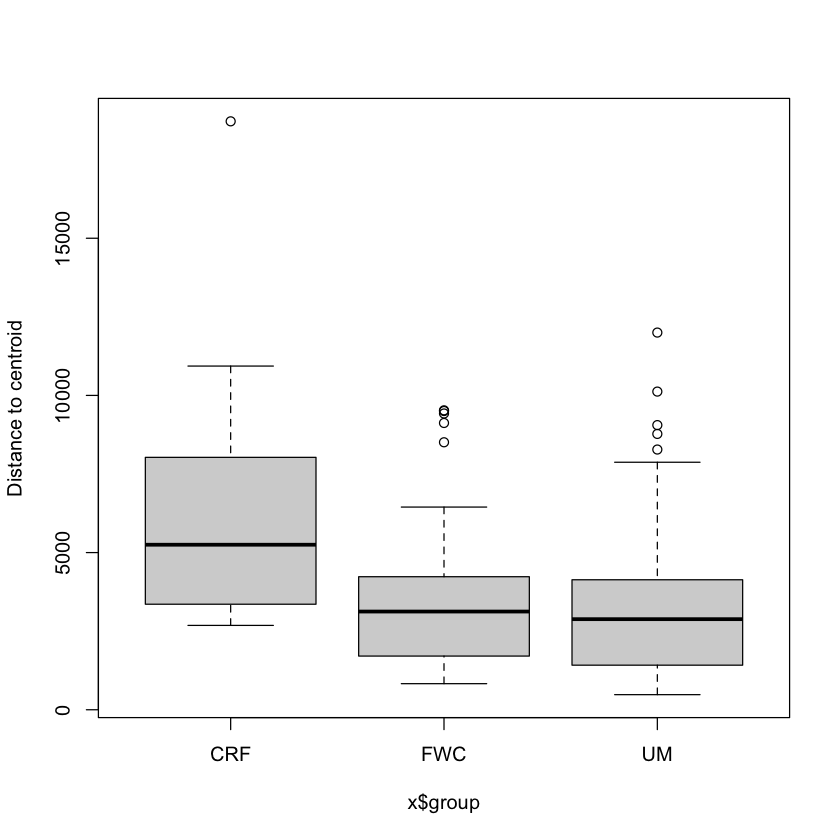

In [99]:
ps_clr <- vegdist(otu_table(t(ps_fill_pair)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_fill_pair)$Nursery)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)





#adonis(t(ps_clr_df)~Nursery, 
 #      data= ps_clr_meta, permutations = 999,
  #       method = "euclidean")





  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
               diff       lwr       upr     p adj
FWC-CRF -13.5859484 -25.92024 -1.251653 0.0297785
UM-CRF  -14.0006010 -26.33490 -1.666306 0.0249914
UM-FWC   -0.4146527 -10.48556  9.656257 0.9938704



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df Sum Sq Mean Sq      F N.Perm Pr(>F)   
Groups     2  609.5 304.751 4.9436    999   0.01 **
Residuals 17 1048.0  61.646                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
         CRF      FWC    UM
CRF          0.032000 0.037
FWC 0.051433          0.632
UM  0.047677 0.700914      

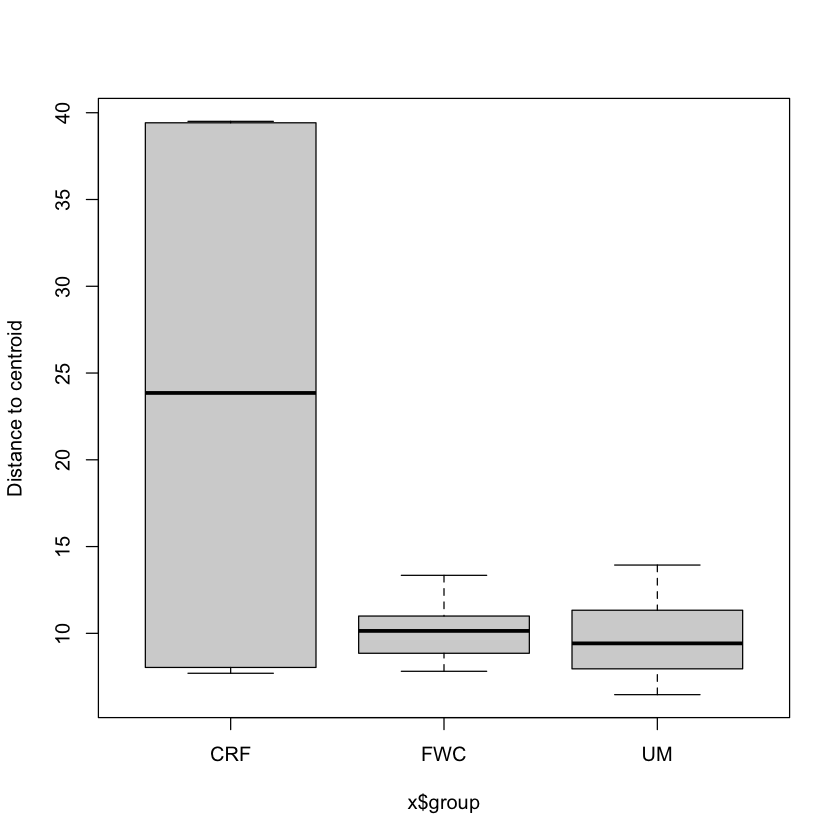

In [100]:
ps_clr_df=as.data.frame(otu_table(ps_clr_Am_Pl_r))
ps_clr_meta= as(sample_data(ps_clr_Am_Pl_r), "data.frame")


ps_clr <- vegdist(otu_table(t(ps_clr_Am_Pl_r)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_clr_Am_Pl_r)$Nursery)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                        diff        lwr        upr p adj
Cooper-9-Acerv2   -0.8555869 -0.8555869 -0.8555869     0
Elkhorn-Acerv2    -1.4468665 -1.4468665 -1.4468665     0
FM14-Acerv2        0.2773976  0.2773976  0.2773976     0
FM19-Acerv2       -1.0298620 -1.0298620 -1.0298620     0
FM6-Acerv2        -2.0810109 -2.0810109 -2.0810109     0
FM9-Acerv2         0.7047235  0.7047235  0.7047235     0
K2-Acerv2         -2.3798777 -2.3798777 -2.3798777     0
Kelsey-1-Acerv2   -3.0977837 -3.0977837 -3.0977837     0
U44-Acerv2        21.1785664 21.1785664 21.1785664     0
Elkhorn-Cooper-9  -0.5912797 -0.5912797 -0.5912797     0
FM14-Cooper-9      1.1329845  1.1329845  1.1329845     0
FM19-Cooper-9     -0.1742751 -0.1742751 -0.1742751     0
FM6-Cooper-9      -1.2254240 -1.2254240 -1.2254240     0
FM9-Cooper-9       1.5603104  1.5603104  1.5603104     0
K2-Cooper-9 

Warning message in anova.lm(lm(Distances ~ Groups, data = model.dat)):
“ANOVA F-tests on an essentially perfect fit are unreliable”
Warning message in summary.lm(mod):
“essentially perfect fit: summary may be unreliable”



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df Sum Sq Mean Sq          F N.Perm Pr(>F)    
Groups     9 919.76   102.2 1.1961e+31    999  0.001 ***
Residuals 10   0.00     0.0                             
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
             Acerv2   Cooper-9    Elkhorn       FM14       FM19        FM6
Acerv2              3.0000e-03 2.0000e-03 3.0000e-03 2.0000e-03 2.0000e-03
Cooper-9 5.3882e-31            6.0000e-03 3.0000e-03 2.0000e-03 2.0000e-03
Elkhorn  0.0000e+00 1.1282e-30            2.0000e-03 1.0000e-03 3.0000e-03
FM14     0.0000e+00 3.0727e-31 0.0000e+00            5.0000e-03 4.0000e-03
FM19     0.0000e+00 1.2987e-29 0.0000e+00 0.0000e+00            1.0000e-03
FM6      0.0000e+00 2.6266e-31 0.0000e+00 0.0000e+00 0.0000e+00           
FM9      0.0000e+0

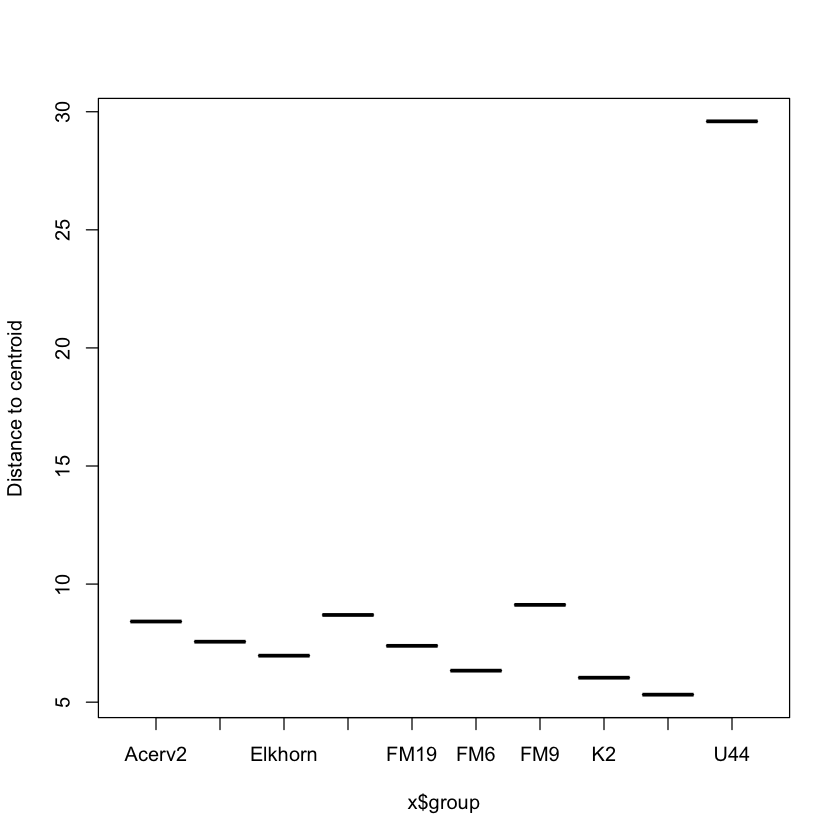

In [104]:
ps_clr_df=as.data.frame(otu_table(ps_clr_Am_Pl_r))
ps_clr_meta= as(sample_data(ps_clr_Am_Pl_r), "data.frame")


ps_clr <- vegdist(otu_table(t(ps_clr_Am_Pl_r)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_clr_Am_Pl_r)$Genotype)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)


# Nutrients susceptibility (dispersed)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 592 taxa and 77 samples ]
sample_data() Sample Data:       [ 77 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 592 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 592 tips and 513 internal nodes ]

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                           diff       lwr        upr     p adj
Susceptible-Resistant -6.311351 -12.09301 -0.5296941 0.0328128



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq Mean Sq      F N.Perm Pr(>F)  
Groups     1   751.1  751.14 4.7289    999  0.037 *
Residuals 75 11912.9  158.84                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
            Resistant Susceptible
Resistant                    0.04
Susceptible  0.032813            

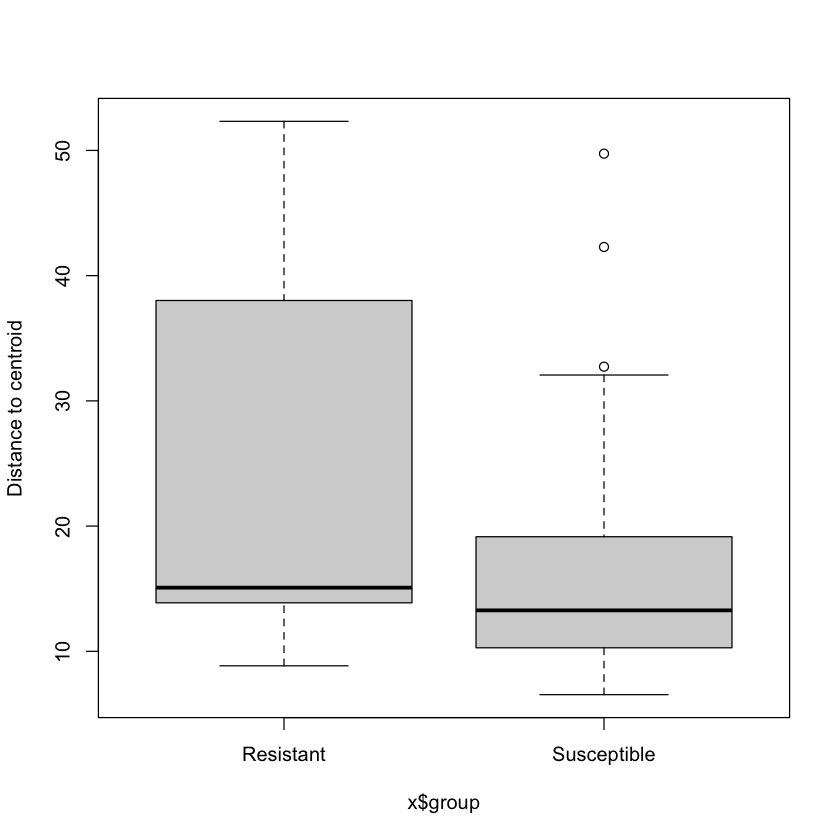

In [102]:
ps_clr_Pl_c


#distances between T-1 only test nutrient treatment
ps_clr <- vegdist(otu_table(t(ps_clr_Pl_c)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_clr_Pl_c)$NH4_Susceptibility)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE)
boxplot(mod_T1)

ps_clr_df=as.data.frame(otu_table(ps_clr_Pl_c))
ps_clr_meta= as(sample_data(ps_clr_Pl_c), "data.frame")


# Disease susceptibility (dispersed)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                          diff      lwr      upr     p adj
Susceptible-Resistant 8.835819 1.582594 16.08904 0.0178635



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq Mean Sq      F N.Perm Pr(>F)  
Groups     1  1119.9 1119.92 5.9552    999  0.021 *
Residuals 56 10531.2  188.06                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
            Resistant Susceptible
Resistant                   0.014
Susceptible  0.017863            

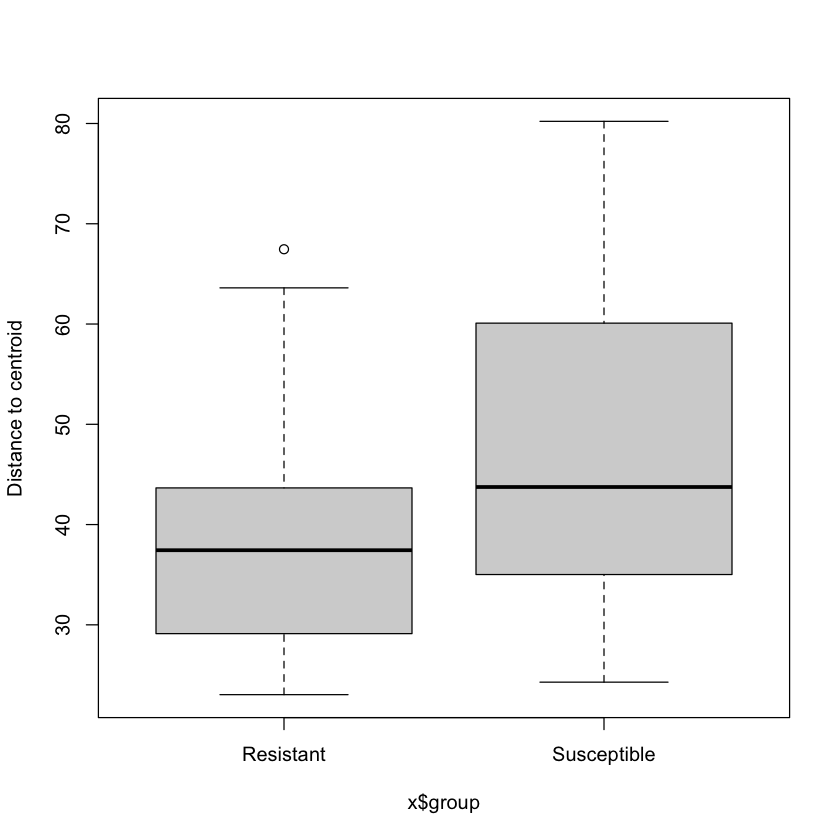

In [103]:


#distances between T-1 only test nutrient treatment
ps_clr <- vegdist(otu_table(t(ps_clr_Pa_c)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_clr_Pa_c)$NH4_Susceptibility)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE)
boxplot(mod_T1)

ps_clr_df=as.data.frame(otu_table(ps_clr_Pa_c))
ps_clr_meta= as(sample_data(ps_clr_Pa_c), "data.frame")